            1. open  2. high  3. low  4. close   5. volume
date                                                      
2005-01-03    39.48    39.69   39.01     39.15  14957900.0
2005-01-04    38.98    39.06   38.32     38.41  11360900.0
2005-01-05    38.60    38.92   38.39     38.49   9770200.0
2005-01-06    38.77    38.98   38.64     38.71   9115900.0
2005-01-07    38.69    38.87   38.39     38.40   9971200.0


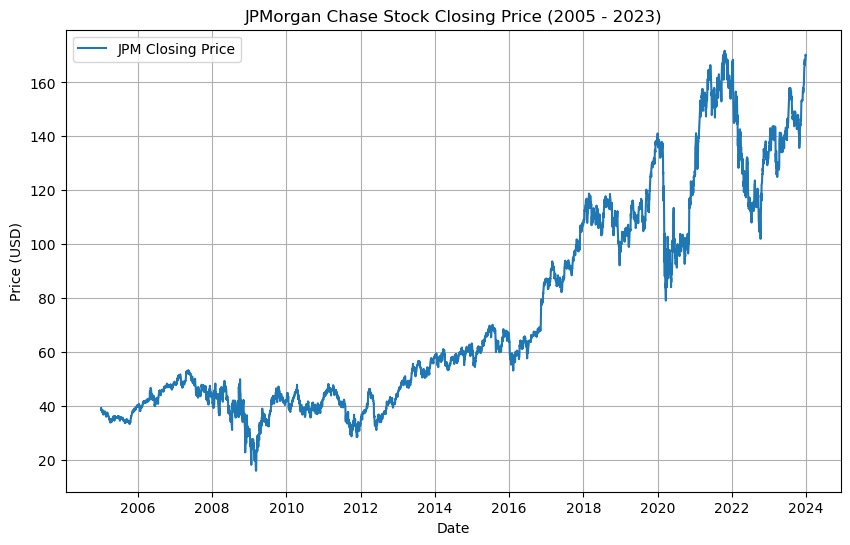

In [1]:
from alpha_vantage.timeseries import TimeSeries
import pandas as pd
import matplotlib.pyplot as plt

api_key = '7NJ0RD8CZC1I0FYL'

# Create a TimeSeries object
ts = TimeSeries(key=api_key, output_format='pandas')

# Retrieve JPMorgan Chase historical stock data (daily)
data, meta_data = ts.get_daily(symbol='JPM', outputsize='full')

# Convert index to datetime and sort the index in ascending order
data.index = pd.to_datetime(data.index)
data = data.sort_index()

# Filter data from 2005 to 2023
data = data['2005-01-01':'2023-12-31']

# Display the first few rows of the dataset
print(data.head())

# Save the data to a CSV file for further analysis if needed
data.to_csv('jpm_stock_data_2005_2023.csv')

# Plot the closing price
plt.figure(figsize=(10, 6))
plt.plot(data['4. close'], label='JPM Closing Price')
plt.title('JPMorgan Chase Stock Closing Price (2005 - 2023)')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

In [2]:
import requests
import pandas as pd

api_key = '7NJ0RD8CZC1I0FYL'

# URLs for SMA, CPI, Interest Rate, and Inflation
sma_url = f'https://www.alphavantage.co/query?function=SMA&symbol=JPM&interval=weekly&time_period=10&series_type=open&apikey={api_key}'
cpi_url = f'https://www.alphavantage.co/query?function=CPI&interval=monthly&apikey={api_key}'
interest_rate_url = f'https://www.alphavantage.co/query?function=FEDERAL_FUNDS_RATE&interval=monthly&apikey={api_key}'
inflation_url = f'https://www.alphavantage.co/query?function=INFLATION&apikey={api_key}'

# Fetch SMA data
sma_response = requests.get(sma_url)
sma_data = sma_response.json()

# Fetch CPI data
cpi_response = requests.get(cpi_url)
cpi_data = cpi_response.json()

# Fetch Federal Funds Rate data
interest_rate_response = requests.get(interest_rate_url)
interest_rate_data = interest_rate_response.json()

# Fetch Inflation data
inflation_response = requests.get(inflation_url)
inflation_data = inflation_response.json()

# Convert SMA data into a DataFrame
sma_df = pd.DataFrame(sma_data['Technical Analysis: SMA']).T
sma_df.index = pd.to_datetime(sma_df.index)
sma_df = sma_df.astype(float)

# Convert CPI data into a DataFrame
cpi_df = pd.DataFrame(cpi_data['data'])
cpi_df['date'] = pd.to_datetime(cpi_df['date'])
cpi_df.set_index('date', inplace=True)
cpi_df = cpi_df[['value']].astype(float)

# Convert Interest Rate data into a DataFrame
interest_rate_df = pd.DataFrame(interest_rate_data['data'])
interest_rate_df['date'] = pd.to_datetime(interest_rate_df['date'])
interest_rate_df.set_index('date', inplace=True)
interest_rate_df = interest_rate_df[['value']].astype(float)

# Convert Inflation data into a DataFrame
inflation_df = pd.DataFrame(inflation_data['data'])
inflation_df['date'] = pd.to_datetime(inflation_df['date'])
inflation_df.set_index('date', inplace=True)
inflation_df = inflation_df[['value']].astype(float)

# Sort the indexes in ascending order
cpi_df = cpi_df.sort_index()
interest_rate_df = interest_rate_df.sort_index()
inflation_df = inflation_df.sort_index()
sma_df = sma_df.sort_index()

# Filter data from 2005 to 2023
cpi_filtered = cpi_df['2005-01-01':'2023-12-31']
interest_rate_filtered = interest_rate_df['2005-01-01':'2023-12-31']
inflation_filtered = inflation_df['2005-01-01':'2023-12-31']
sma_filtered = sma_df['2005-01-01':'2023-12-31']

# Resample to yearly averages
cpi_yearly = cpi_filtered.resample('YE').mean()
interest_rate_yearly = interest_rate_filtered.resample('YE').mean()
inflation_yearly = inflation_filtered.resample('YE').mean()
sma_yearly = sma_filtered.resample('YE').mean()

# Convert to lists for model input
cpi_list = cpi_yearly['value'].tolist()
interest_rate_list = interest_rate_yearly['value'].tolist()
inflation_list = inflation_yearly['value'].tolist()
sma_list = sma_yearly['SMA'].tolist()

# Display the data lists
print("CPI List:", cpi_list)
print("Interest Rate List:", interest_rate_list)
print("Inflation List:", inflation_list)
print("SMA List:", sma_list)


# Create DataFrames for each dataset and save them as CSV files
cpi_yearly.to_csv('cpi_yearly_2005_2023.csv')
interest_rate_yearly.to_csv('interest_rate_yearly_2005_2023.csv')
inflation_yearly.to_csv('inflation_yearly_2005_2023.csv')
sma_yearly.to_csv('sma_yearly_2005_2023.csv')


CPI List: [195.29166666666666, 201.59166666666667, 207.34241666666665, 215.3025, 214.537, 218.05550000000002, 224.93916666666667, 229.59391666666667, 232.95708333333334, 236.73616666666666, 237.01700000000002, 240.00716666666665, 245.11958333333334, 251.10683333333336, 255.65741666666668, 258.8111666666667, 270.96975000000003, 292.6549166666667, 304.7015833333333]
Interest Rate List: [3.2133333333333334, 4.964166666666666, 5.019166666666666, 1.9275, 0.16, 0.17500000000000002, 0.10166666666666667, 0.14, 0.1075, 0.08916666666666667, 0.1325, 0.395, 1.0016666666666667, 1.8316666666666668, 2.158333333333333, 0.3758333333333333, 0.08, 1.6833333333333333, 5.024166666666667]
Inflation List: [3.3927468454955, 3.22594410070404, 2.85267248150138, 3.839100296651, -0.355546266299747, 1.6400434423899, 3.156841568622, 2.06933726526067, 1.46483265562717, 1.62222297740817, 0.118627135552451, 1.26158320570536, 2.13011000365961, 2.44258329692817, 1.81221007526021, 1.23358439630629, 4.69785886363742, 8.00